<a href="https://colab.research.google.com/github/AditiDas1601/Shock-Filtering/blob/main/Shock_filter_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing required packages

In [ ]:
!pip install opencv-python

# Importing required packages

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.ndimage import laplace,convolve

# Storing text image as array

In [ ]:
I = cv2.imread('/content/test_pic.png', cv2.IMREAD_GRAYSCALE)
I = I.astype(np.float64)

# Creating Gaussian filter for smoothening

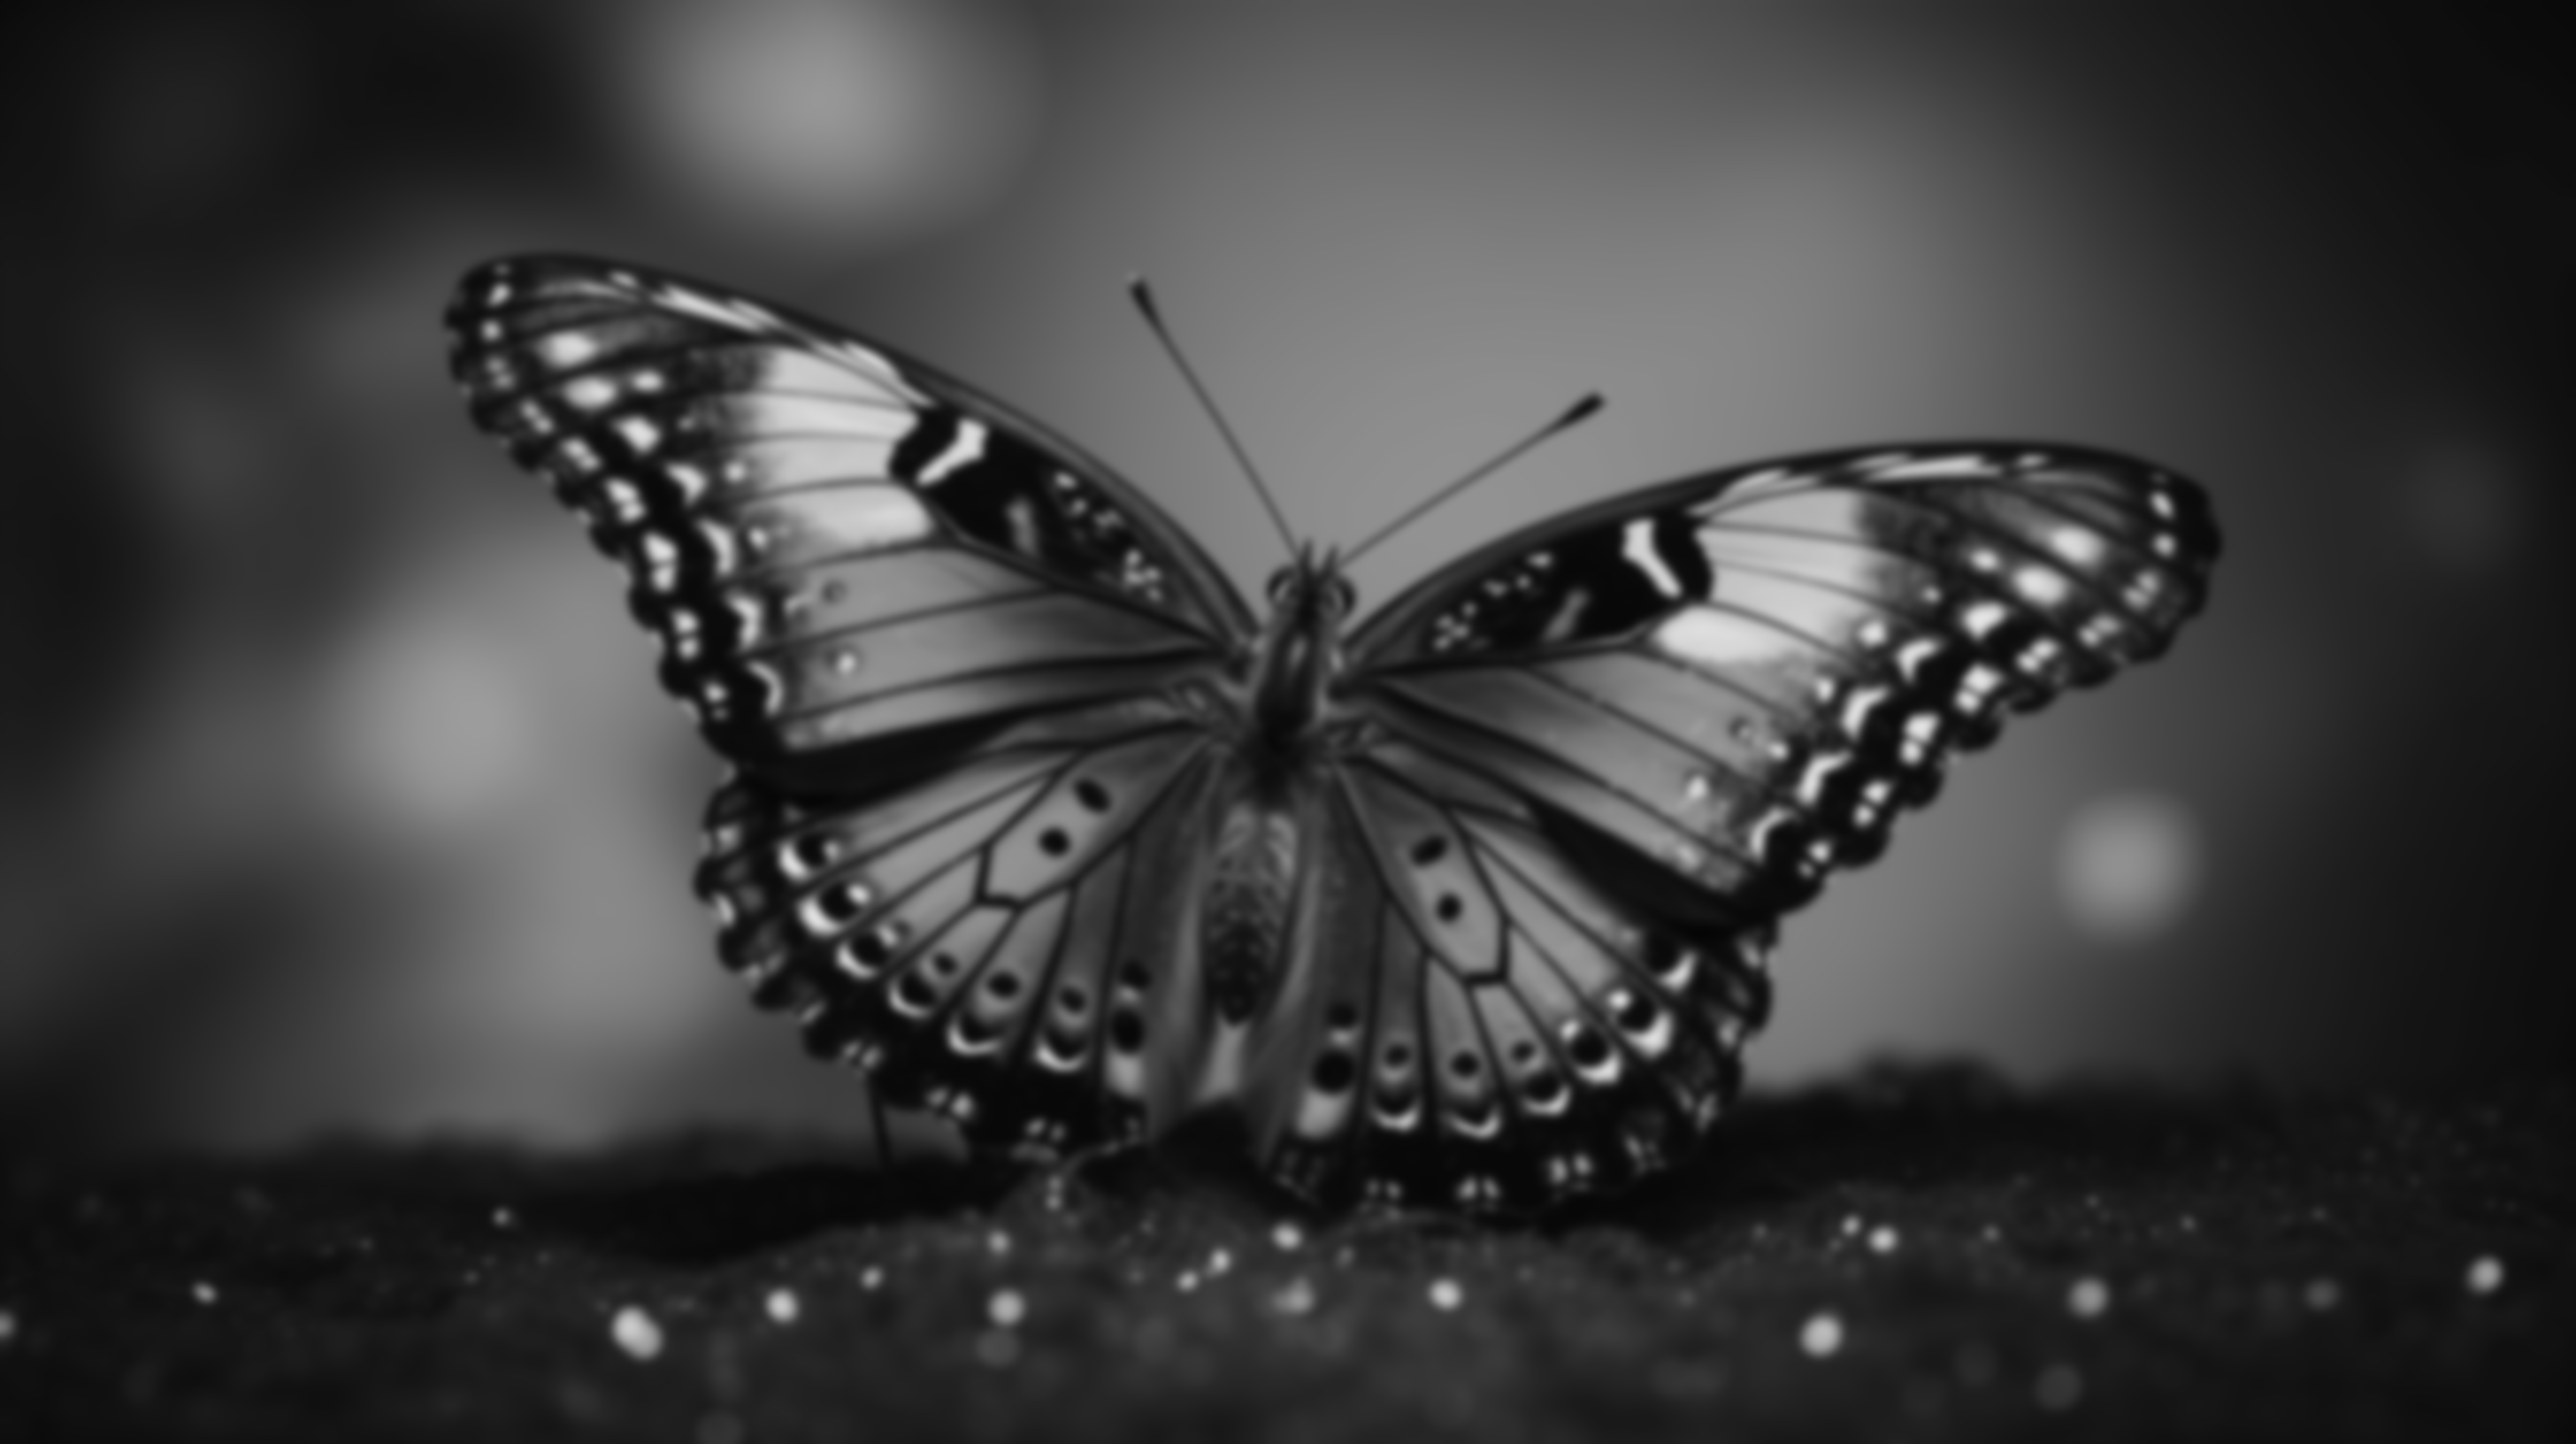

In [ ]:
maskSize=9
iterations=20
dt=0.25
g = cv2.getGaussianKernel(maskSize, 1)
g = np.outer(g, g)  # Create a 2D Gaussian kernel
G = I.copy()
G = convolve(G, g)
cv2_imshow(G)

# Filtering using shock filters:

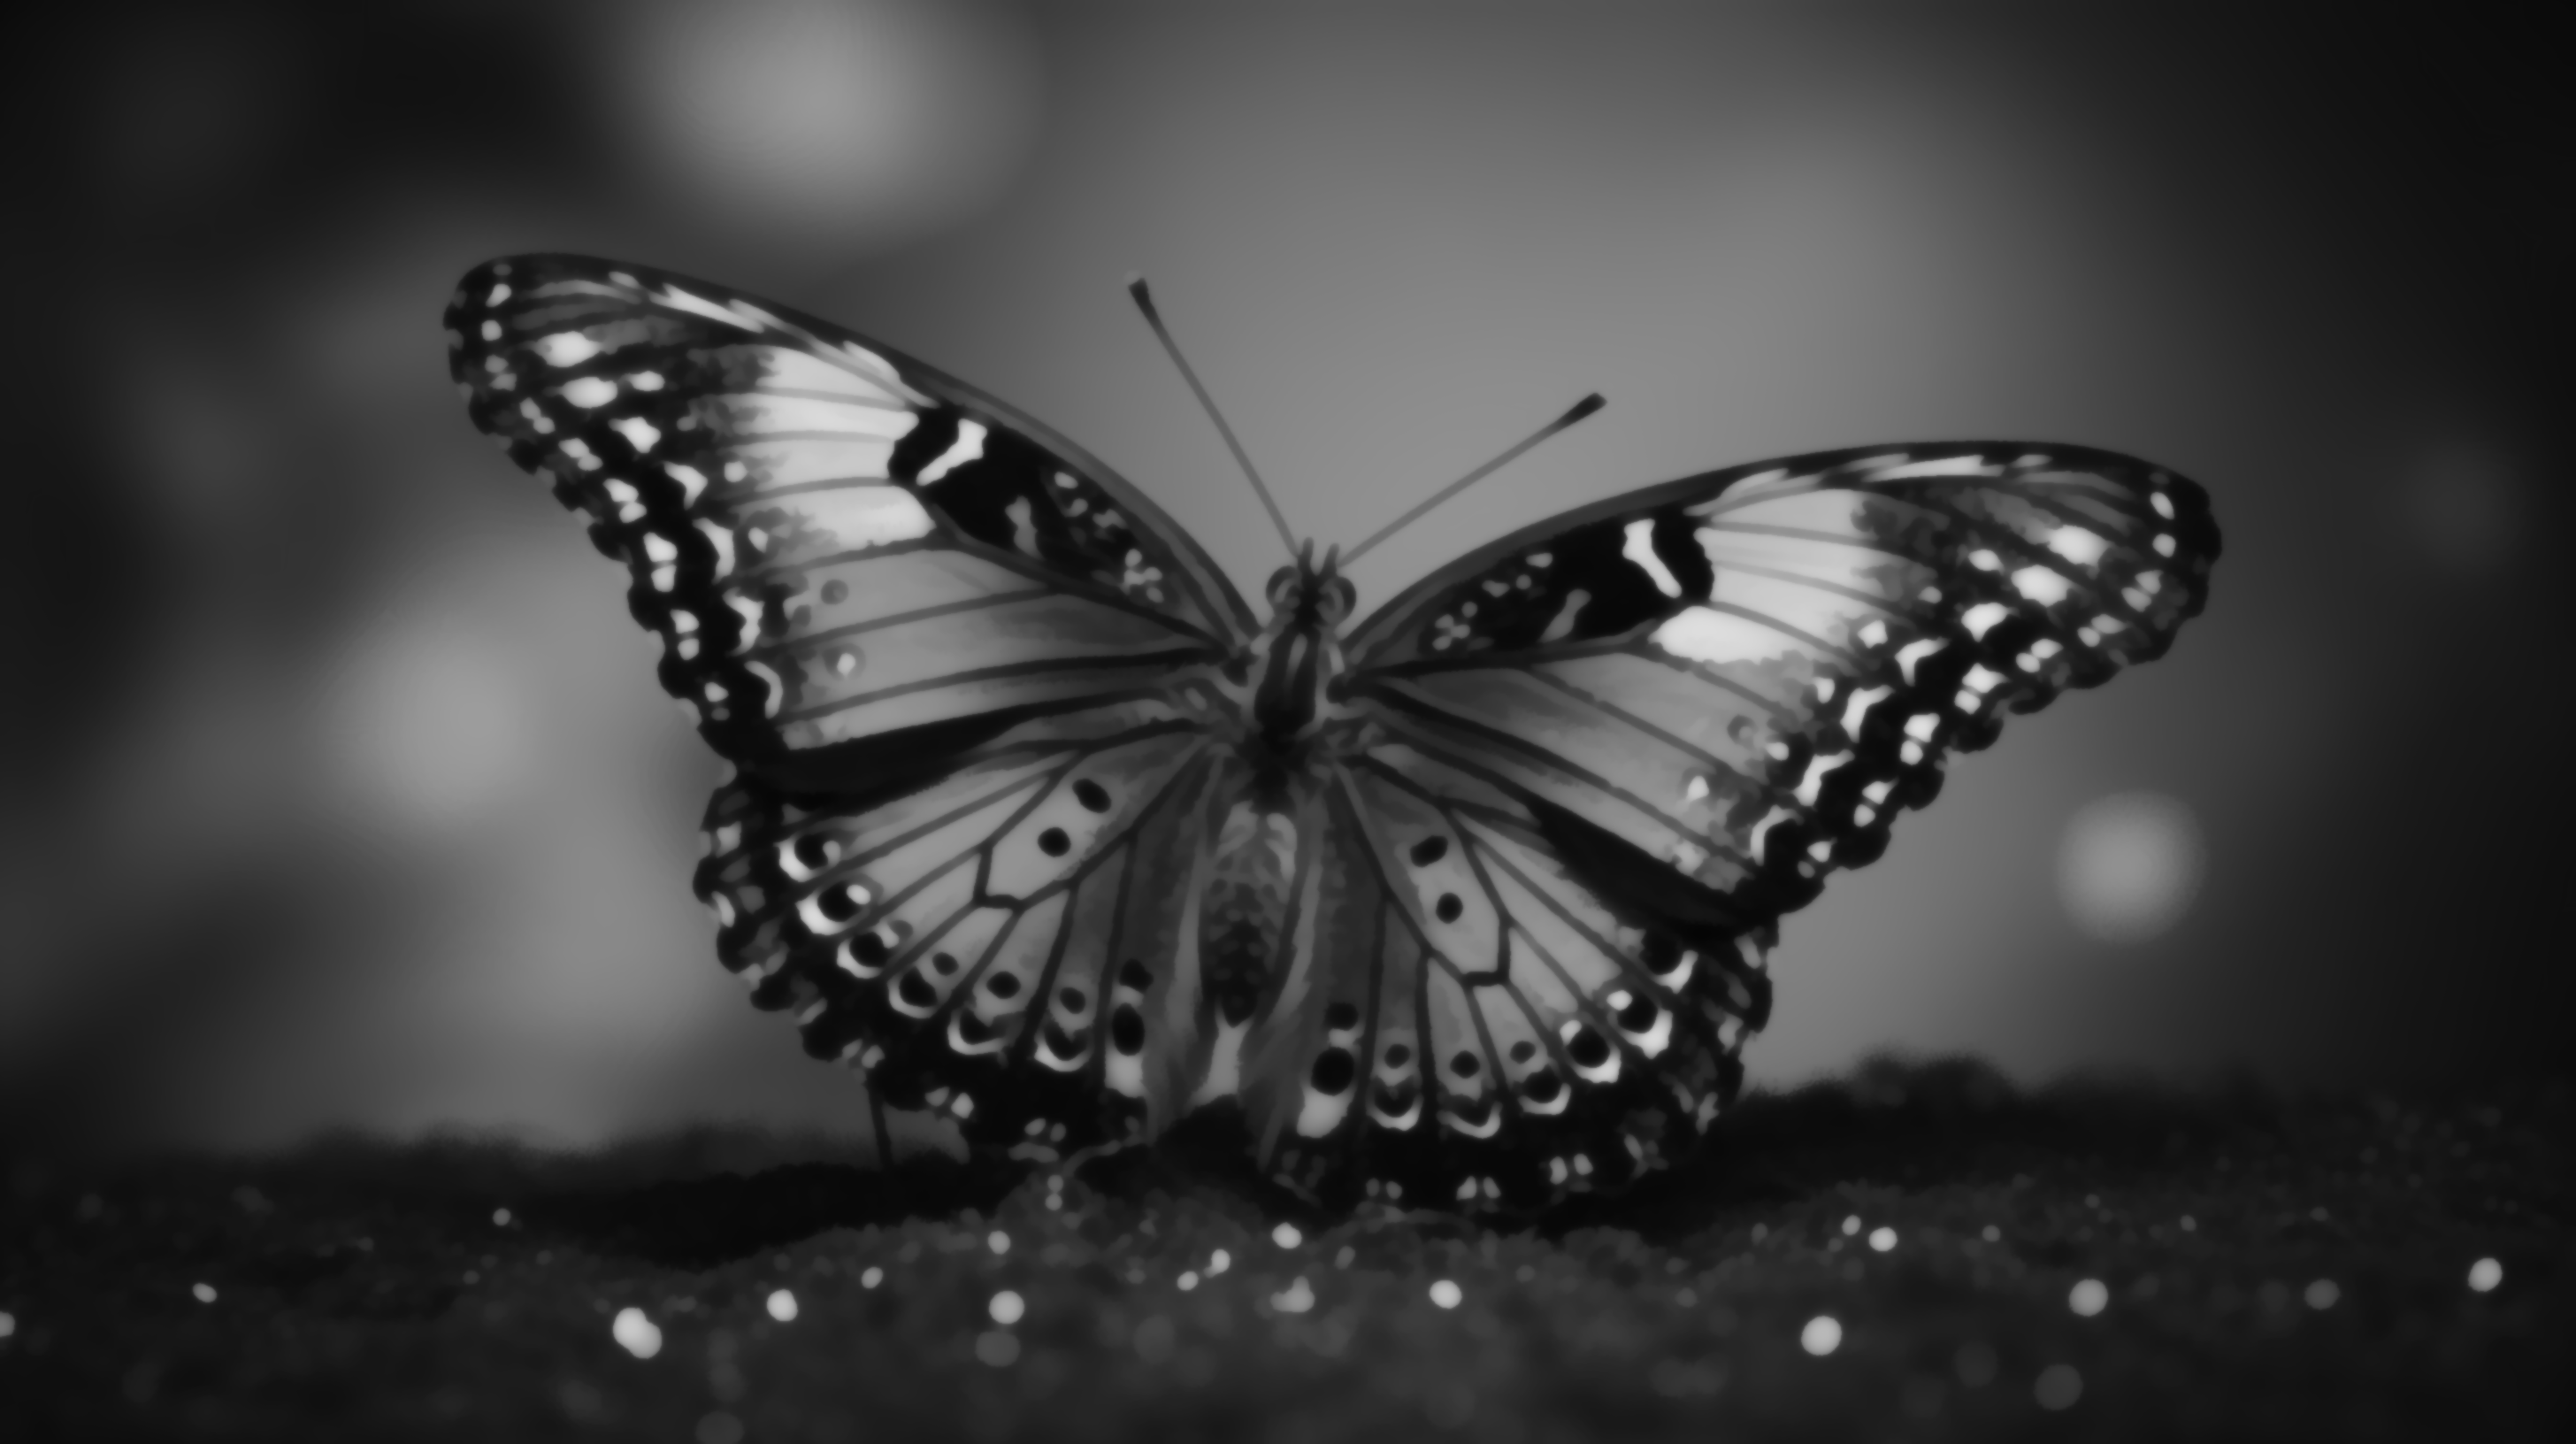

In [ ]:
for i in range(iterations):
  G = convolve(G, g)
  grad=np.gradient(G)
  gx, gy = grad
  normxy = np.sqrt(gx**2 + gy**2)
  s = -np.sign(laplace(G))  # Approximate del2 using gradient
  test=dt * s * normxy
  G = np.array(G) + test
cv2_imshow(G)